### Retail Data 

In [160]:
# import of diff lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [161]:
# file import 
customer_data = pd.read_csv('Customer.csv')

In [162]:
customer_data.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [163]:
# null values check

customer_data.isnull().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [164]:
#where is null data

customer_data[customer_data.isnull().any(axis=1)]

,customer_Id,DOB,Gender,city_code
24,267199,14-02-1970,NaN,2.0
87,271626,02-06-1970,NaN,6.0
115,268447,14-07-1970,M,NaN
149,268709,09-09-1970,F,NaN


In [165]:
# grouped data City by Male & Female
customer_data.groupby(['city_code','Gender']).size()

city_code  Gender
1.0        F         288
           M         263
2.0        F         261
           M         302
3.0        F         271
           M         324
4.0        F         272
           M         310
5.0        F         287
           M         299
6.0        F         265
           M         260
7.0        F         293
           M         282
8.0        F         247
           M         315
9.0        F         286
           M         260
10.0       F         282
           M         276
dtype: int64

In [166]:
# populating null Value with 'Male' because male population is higher in city 2 id(267199)

customer_data.loc[customer_data['customer_Id'] == 267199, 'Gender'] = customer_data.loc[customer_data['customer_Id'] == 267199, 'Gender'].fillna('M')

#populating null Value with 'Female' because male population is higher in city 6 id(271626)

customer_data.loc[customer_data['customer_Id'] == 271626, 'Gender'] = customer_data.loc[customer_data['customer_Id'] == 271626, 'Gender'].fillna('F')

In [167]:
# check the data
customer_data.loc[customer_data['customer_Id'].isin([271626, 267199 ])]


,customer_Id,DOB,Gender,city_code
24,267199,14-02-1970,M,2.0
87,271626,02-06-1970,F,6.0


In [168]:
# calculated the city mean 

customer_data.city_code.mean()

5.472630646589902

In [169]:
# populating null Value with 5 because male population is higher in city 5 id (268447)

customer_data.loc[customer_data['customer_Id'] == 268447, 'city_code'] = customer_data.loc[customer_data['customer_Id'] == 268447, 'city_code'].fillna(5.0)


# populating null Value with 6 because female population is higher in city 6 id(268709)

customer_data.loc[customer_data['customer_Id'] == 268709, 'city_code'] = customer_data.loc[customer_data['customer_Id'] == 268709, 'city_code'].fillna(6.0)



In [170]:
# check the data
customer_data.loc[customer_data['customer_Id'].isin([268447,268709 ])]


,customer_Id,DOB,Gender,city_code
115,268447,14-07-1970,M,5.0
149,268709,09-09-1970,F,6.0


In [171]:
#data discription
customer_data.describe()

,customer_Id,city_code
count,5647.000000,5647.000000
mean,271037.281034,5.472640
std,2451.261711,2.859427
min,266783.000000,1.000000
25%,268912.000000,3.000000
50%,271028.000000,5.000000
75%,273180.000000,8.000000
max,275265.000000,10.000000


In [172]:
customer_data.dtypes

customer_Id      int64
DOB             object
Gender          object
city_code      float64
dtype: object

In [173]:
# converting data types

# DOB is object to datetime
customer_data['DOB'] = pd.to_datetime(customer_data['DOB'])

# city_code is float64 to int8
customer_data['city_code'] = customer_data['city_code'].astype('int8')

customer_data.dtypes  

C:\Users\mohit\AppData\Local\Temp\ipykernel_27580\3600732608.py:4: UserWarning: Parsing '15-01-1970' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_data['DOB'] = pd.to_datetime(customer_data['DOB'])
C:\Users\mohit\AppData\Local\Temp\ipykernel_27580\3600732608.py:4: UserWarning: Parsing '16-01-1970' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_data['DOB'] = pd.to_datetime(customer_data['DOB'])
C:\Users\mohit\AppData\Local\Temp\ipykernel_27580\3600732608.py:4: UserWarning: Parsing '18-01-1970' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_data['DOB'] = pd.to_datetime(customer_data['DOB'])
C:\Users\mohit\AppData\Local\Temp\ipykernel_27580\3600732608.py:4: UserWarning: Parsing '21-01-1970' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_dat

customer_Id             int64
DOB            datetime64[ns]
Gender                 object
city_code                int8
dtype: object

### Trnsaction file

In [174]:
tran_data = pd.read_csv('Transactions.csv')

In [175]:
tran_data.head(5)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [176]:
#Column Rename
tran_data.rename(columns={'cust_id': 'customer_Id'}, inplace=True)

In [177]:
tran_data.shape

(23053, 10)

In [178]:
tran_data.isnull().sum()

transaction_id      0
customer_Id         0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64

In [179]:
tran_data.dtypes

transaction_id        int64
customer_Id           int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
dtype: object

In [180]:
# tran_date is object to datetime
tran_data['tran_date'] = pd.to_datetime(tran_data['tran_date'])

# prod_subcat_code is int64 to int8
tran_data['prod_subcat_code'] = tran_data['prod_subcat_code'].astype('int8')

# prod_cat_code is int64 to int8
tran_data['prod_cat_code'] = tran_data['prod_cat_code'].astype('int8')

# Qty  is int64 to int8
tran_data['Qty'] = tran_data['Qty'].astype('int8')

# Rate is int64 to float64
tran_data['Rate'] = tran_data['Rate'].astype('float64')

tran_data.dtypes 

C:\Users\mohit\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\mohit\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\mohit\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\mohit\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-02-2014' in DD/MM/YYYY format. Provide format or specif

transaction_id               int64
customer_Id                  int64
tran_date           datetime64[ns]
prod_subcat_code              int8
prod_cat_code                 int8
Qty                           int8
Rate                       float64
Tax                        float64
total_amt                  float64
Store_type                  object
dtype: object

### Product data file

In [181]:
# import data
prod_data = pd.read_csv('prod_cat_info.csv')

In [182]:
prod_data.head(5)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [183]:
#Column Rename
prod_data.rename(columns={'prod_sub_cat_code': 'prod_subcat_code'}, inplace=True)

In [184]:
prod_data.isnull().sum()

prod_cat_code       0
prod_cat            0
prod_subcat_code    0
prod_subcat         0
dtype: int64

In [185]:
prod_data.dtypes

prod_cat_code        int64
prod_cat            object
prod_subcat_code     int64
prod_subcat         object
dtype: object

In [186]:
# prod_cat_code is int64 to int8
prod_data['prod_cat_code'] = prod_data['prod_cat_code'].astype('int8')

# prod_sub_cat_code is int64 to int8
prod_data['prod_sub_cat_code'] = prod_data['prod_sub_cat_code'].astype('int8')

prod_data.dtypes

KeyError: 'prod_sub_cat_code'

### Merger

In [227]:
merge_df_1 = pd.merge(customer_data, tran_data, how='inner')
merge_df_1.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,1970-02-01,M,4,87243835584,2014-01-13,7,5,5,187.0,98.175,1033.175,TeleShop
1,268408,1970-02-01,M,4,16197868036,2013-12-16,1,4,-5,-210.0,110.250,-1160.250,Flagship store
2,268408,1970-02-01,M,4,16197868036,2013-12-12,1,4,5,210.0,110.250,1160.250,Flagship store
3,268408,1970-02-01,M,4,28810141075,2013-02-09,10,6,2,813.0,170.730,1796.730,TeleShop
4,268408,1970-02-01,M,4,64633435931,2013-06-05,4,2,3,312.0,98.280,1034.280,Flagship store


In [228]:
merge_df_2 =pd.merge(prod_data,tran_data, how='inner' )
merge_df_2.head()

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat,transaction_id,customer_Id,tran_date,Qty,Rate,Tax,total_amt,Store_type
0,1,Clothing,4,Mens,28396777609,269101,2014-02-19,4,1386.0,582.12,6126.12,TeleShop
1,1,Clothing,4,Mens,58956348529,272484,2014-02-18,4,1443.0,606.06,6378.06,TeleShop
2,1,Clothing,4,Mens,83498320600,273359,2014-02-18,4,861.0,361.62,3805.62,e-Shop
3,1,Clothing,4,Mens,78091789730,271030,2014-02-18,1,380.0,39.90,419.90,e-Shop
4,1,Clothing,4,Mens,83108241933,273896,2014-02-16,2,574.0,120.54,1268.54,e-Shop


In [229]:
Customer_Final = pd.merge(merge_df_1,merge_df_2)

In [230]:
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4,87243835584,2014-01-13,7,5,5,187.0,98.175,1033.175,TeleShop,Books,Fiction
1,268408,1970-02-01,M,4,16197868036,2013-12-16,1,4,-5,-210.0,110.250,-1160.250,Flagship store,Bags,Mens
2,268408,1970-02-01,M,4,16197868036,2013-12-12,1,4,5,210.0,110.250,1160.250,Flagship store,Bags,Mens
3,268408,1970-02-01,M,4,28810141075,2013-02-09,10,6,2,813.0,170.730,1796.730,TeleShop,Home and kitchen,Kitchen
4,268408,1970-02-01,M,4,64633435931,2013-06-05,4,2,3,312.0,98.280,1034.280,Flagship store,Footwear,Kids


In [231]:
Customer_Final.nunique()

customer_Id          5506
DOB                  3987
Gender                  2
city_code              10
transaction_id      20878
tran_date            1129
prod_subcat_code       12
prod_cat_code           6
Qty                    10
Rate                 2551
Tax                  4194
total_amt            5764
Store_type              4
prod_cat                6
prod_subcat            18
dtype: int64

In [ ]:
Customer_Final.head(5)

In [ ]:
# randomly checking
Customer_Final[Customer_Final['customer_Id'] == 270351]

In [232]:
# finding duplicate data
Customer_Final.duplicated().sum()

39

In [203]:
# identify dupilicates
Customer_Final[Customer_Final.duplicated()]

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
187,273106,1970-03-23,F,2,426787191,2012-05-28,1,2,-5,-109.0,57.225,-602.225,e-Shop,Footwear,Mens
188,273106,1970-03-23,F,2,426787191,2012-05-28,1,2,-5,-109.0,57.225,-602.225,e-Shop,Footwear,Mens
189,273106,1970-03-23,F,2,426787191,2012-05-28,1,2,-5,-109.0,57.225,-602.225,e-Shop,Footwear,Mens
5321,268663,1975-05-17,F,8,84298959416,2012-04-22,3,5,-2,-321.0,67.410,-709.410,TeleShop,Books,Comics
5322,268663,1975-05-17,F,8,84298959416,2012-04-22,3,5,-2,-321.0,67.410,-709.410,TeleShop,Books,Comics
5323,268663,1975-05-17,F,8,84298959416,2012-04-22,3,5,-2,-321.0,67.410,-709.410,TeleShop,Books,Comics
5932,273937,1975-11-19,M,5,95523406151,2012-09-16,8,3,-5,-483.0,253.575,-2668.575,e-Shop,Electronics,Personal Appliances
5933,273937,1975-11-19,M,5,95523406151,2012-09-16,8,3,-5,-483.0,253.575,-2668.575,e-Shop,Electronics,Personal Appliances
5934,273937,1975-11-19,M,5,95523406151,2012-09-16,8,3,-5,-483.0,253.575,-2668.575,e-Shop,Electronics,Personal Appliances
7938,270229,1977-01-12,M,9,68625357665,2012-04-24,12,6,-5,-79.0,41.475,-436.475,Flagship store,Home and kitchen,Tools


In [205]:
Customer_Final[Customer_Final['transaction_id'] == 84298959416].sort_values('prod_subcat_code')

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
5320,268663,1975-05-17,F,8,84298959416,2012-04-22,3,5,-2,-321.0,67.41,-709.41,TeleShop,Books,Comics
5321,268663,1975-05-17,F,8,84298959416,2012-04-22,3,5,-2,-321.0,67.41,-709.41,TeleShop,Books,Comics
5322,268663,1975-05-17,F,8,84298959416,2012-04-22,3,5,-2,-321.0,67.41,-709.41,TeleShop,Books,Comics
5323,268663,1975-05-17,F,8,84298959416,2012-04-22,3,5,-2,-321.0,67.41,-709.41,TeleShop,Books,Comics
5324,268663,1975-05-17,F,8,84298959416,2012-04-20,3,5,2,321.0,67.41,709.41,TeleShop,Books,Comics


In [233]:
# removed duplicates
Customer_Final = Customer_Final.drop_duplicates()

In [234]:
Customer_Final.duplicated().sum()

0

### Analysis

In [238]:
#2. Prepare a summary report for the merged data set.
# a. Get the column names and their corresponding data types
Customer_Final.dtypes

customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                     int8
transaction_id               int64
tran_date           datetime64[ns]
prod_subcat_code              int8
prod_cat_code                 int8
Qty                           int8
Rate                       float64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
Year                         int64
Month                       object
Day_Name                    object
Age                          int32
dtype: object

In [209]:
# b. Top/Bottom 10 observations

# Top 10 observations
top_10 = Customer_Final.groupby('customer_Id')['total_amt'].sum().nlargest(10)

top_10

customer_Id
271834    41510.430
273140    35861.670
272354    33954.440
267419    33828.470
274948    33158.840
270908    32401.915
270535    31969.860
272799    31336.695
274227    31119.010
274747    30512.365
Name: total_amt, dtype: float64

In [210]:
# Bottom 10 observations
bottom_10 = Customer_Final.groupby('customer_Id')['total_amt'].sum().nsmallest(10)

bottom_10 

customer_Id
270308   -9352.720
272871   -7833.345
273498   -5828.875
271238   -4685.200
274415   -4090.710
267780   -3863.080
271391   -3593.460
267489   -3270.800
268606   -2642.055
267269   -2417.740
Name: total_amt, dtype: float64

In [ ]:
### “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [257]:
Customer_Final.describe(include=(float)).transpose()[['min', '25%', '50%', '75%', 'max']]  

,min,25%,50%,75%,max
Rate,-1499.000,312.00,710.00,1109.0000,1500.0
Tax,7.350,98.28,199.08,365.7675,787.5
total_amt,-8270.925,762.45,1756.95,3570.2550,8287.5


In [263]:
Customer_Final['Qty'].describe()[['min', '25%', '50%', '75%', 'max']]

min   -5.0
25%    1.0
50%    3.0
75%    4.0
max    5.0
Name: Qty, dtype: float64

In [319]:
Customer_Final['Age'].describe()[['min', '25%', '50%', '75%', 'max']]

min    30.0
25%    35.0
50%    41.0
75%    47.0
max    53.0
Name: Age, dtype: float64

In [ ]:
# d. Frequency tables for all the categorical variables

In [276]:
Customer_Final.describe(include=object)

,Gender,Store_type,prod_cat,prod_subcat,Month,Day_Name
count,23040,23040,23040,23040,23040,23040
unique,2,4,6,18,12,7
top,M,e-Shop,Books,Women,January,Sunday
freq,11809,9304,6066,3046,2031,3414


In [280]:
Customer_Final['Gender'].value_counts(normalize=True)

M    0.512543
F    0.487457
Name: Gender, dtype: float64

In [283]:
Customer_Final['Store_type'].value_counts(normalize=True)

e-Shop            0.403819
MBR               0.202257
Flagship store    0.198568
TeleShop          0.195356
Name: Store_type, dtype: float64

In [284]:
Customer_Final['prod_cat'].value_counts(normalize=True)

Books               0.263281
Electronics         0.212457
Home and kitchen    0.179080
Footwear            0.130035
Clothing            0.128472
Bags                0.086675
Name: prod_cat, dtype: float64

In [285]:
Customer_Final['prod_subcat'].value_counts(normalize=True)

Women                  0.132205
Mens                   0.126302
Kids                   0.086675
Tools                  0.046050
Fiction                0.045269
Kitchen                0.044965
Children               0.044922
Comics                 0.044705
Mobiles                0.044705
Bath                   0.044358
Furnishing             0.043707
Non-Fiction            0.043533
DIY                    0.042925
Cameras                0.042752
Personal Appliances    0.042101
Academic               0.041927
Computers              0.041580
Audio and video        0.041319
Name: prod_subcat, dtype: float64

### DATA Segregation

In [236]:
# Geting Year,Month_Name, Day_Name
Customer_Final['Year'] = Customer_Final.tran_date.dt.year
Customer_Final['Month'] = Customer_Final.tran_date.dt.strftime("%B")
Customer_Final['Day_Name']= Customer_Final.tran_date.dt.strftime("%A")

In [237]:
#Calcuting the age of customer
import datetime as dt
current_date = dt.datetime.today()
Customer_Final['Age'] = ((current_date - Customer_Final['DOB'])/pd.Timedelta(days=365.25)).astype(int)

In [289]:
Store_type_count = Customer_Final['Store_type'].value_counts()
Store_type_count

e-Shop            9304
MBR               4660
Flagship store    4575
TeleShop          4501
Name: Store_type, dtype: int64

In [290]:
count_prod_cat = Customer_Final['prod_cat'].value_counts()
count_prod_cat

Books               6066
Electronics         4895
Home and kitchen    4126
Footwear            2996
Clothing            2960
Bags                1997
Name: prod_cat, dtype: int64

In [288]:
count_prod_subcat = Customer_Final['prod_subcat'].value_counts()
count_prod_subcat 

Women                  3046
Mens                   2910
Kids                   1997
Tools                  1061
Fiction                1043
Kitchen                1036
Children               1035
Comics                 1030
Mobiles                1030
Bath                   1022
Furnishing             1007
Non-Fiction            1003
DIY                     989
Cameras                 985
Personal Appliances     970
Academic                966
Computers               958
Audio and video         952
Name: prod_subcat, dtype: int64

### Charts (3. Generate histograms for all continuous variables and frequency bars for categorical variables.
)

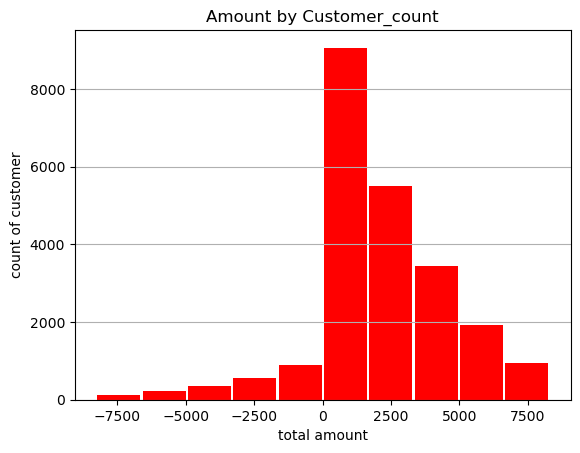

In [291]:
plt.hist(x=Customer_Final.total_amt,histtype="bar",rwidth=0.95,color="r")
plt.xlabel("total amount")
plt.ylabel("count of customer")
plt.title('Amount by Customer_count')
plt.grid(which='major',axis='y')
plt.show()

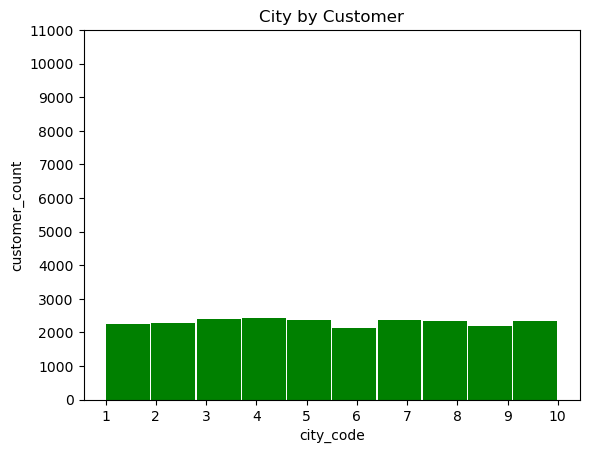

In [292]:
plt.hist(Customer_Final.city_code,rwidth=0.97,color='g')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10])
plt.yticks(ticks=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000])
plt.xlabel("city_code")
plt.ylabel("customer_count")
plt.title("City by Customer")
plt.show()

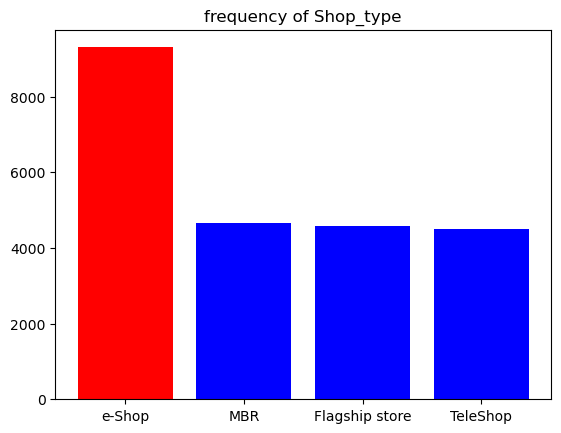

In [293]:
plt.bar(Store_type_count.index, Store_type_count.values, color=['red','blue','blue','blue'])
plt.title("frequency of Shop_type")
plt.show()

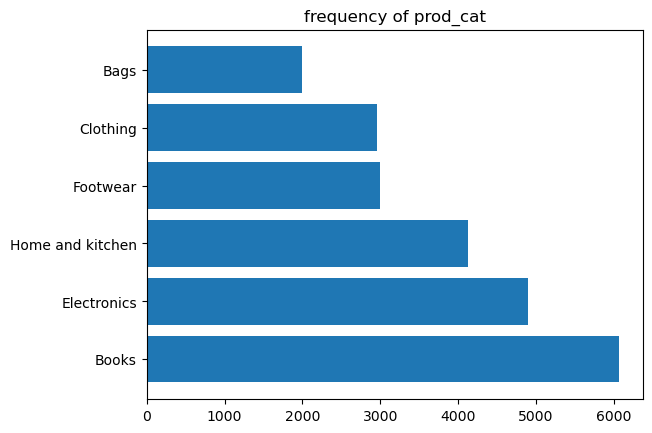

<Figure size 400x1600 with 0 Axes>

In [294]:
plt.barh(count_prod_cat.index, count_prod_cat.values)
plt.title("frequency of prod_cat")
plt.figure(figsize=(4,16))
plt.show()

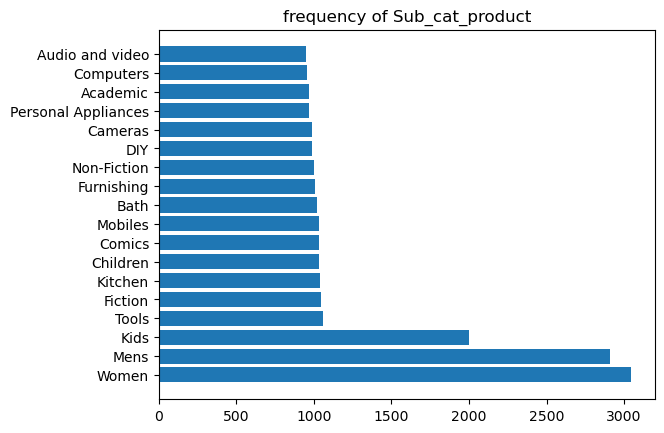

In [295]:
plt.barh(count_prod_subcat.index,count_prod_subcat.values)
plt.title("frequency of Sub_cat_product")
plt.show()

###  Calculate the following information using the merged dataset :
        (a. Time period of the available transaction data)


In [296]:
Time_period_max = Customer_Final['tran_date'].max()
print(Time_period_max)

2014-12-02 00:00:00


In [297]:
Time_period_min = Customer_Final['tran_date'].min()

print(Time_period_min)

2011-01-02 00:00:00


### b. Count of transactions where the total amount of transaction was negative...

In [304]:
len(Customer_Final[Customer_Final['total_amt'] < 0])

2164

### 5. Analyze which product categories are more popular among females vs male customers.

In [305]:
# 5. Analyze which product categories are more popular among females vs male customers.
cross_tab = pd.crosstab(Customer_Final['Gender'], Customer_Final['prod_cat'])
cross_tab

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,993,2948,1439,2328,1529,1994
M,1004,3118,1521,2567,1467,2132


In [306]:
# 6. Which City code has the maximum customers and what was the percentage of customers from that city?

city_count = Customer_Final['city_code'].value_counts()

city_count.max()

city_count_percent = 100 * (city_count.max())/len(Customer_Final)

print(f"The city {city_count.idxmax()} with the maximum customers is {city_count.max()}, with {city_count_percent:.2f}% of the customers.")

The city 4 with the maximum customers is 2422, with 10.51% of the customers.


<AxesSubplot:xlabel='Store_type'>

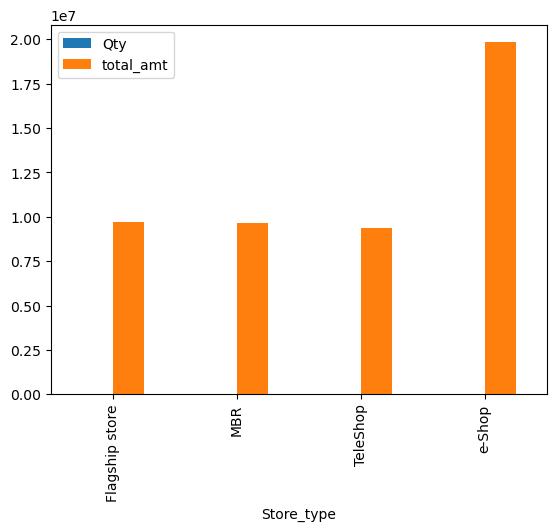

In [307]:
# 7. Which store type sells the maximum products by value and by quantity? 
(Customer_Final.groupby(['Store_type']).agg({'Qty':'sum', 'total_amt':'sum'})).plot(kind='bar')

In [309]:
print(Customer_Final.groupby(['Store_type']).agg({'Qty':'sum', 'total_amt':'sum'}))

                    Qty     total_amt
Store_type                           
Flagship store  11142.0  9.721597e+06
MBR             11195.0  9.674941e+06
TeleShop        10993.0  9.372134e+06
e-Shop          22790.0  1.984262e+07


In [310]:
# 8. What was the total amount earned from the "Electronics" and "Clothing" categories only from Flagship Stores?

ss = Customer_Final.groupby(['Store_type', 'prod_cat'])['total_amt'].sum()

print(f"The amount earned from Clothing is {ss.loc['Flagship store', 'Clothing']} and Electronics is {ss.loc['Flagship store', 'Electronics']}")

The amount earned from Clothing is 1194423.23 and Electronics is 2215136.04


In [311]:
#9. What was the total amount earned from "Male" customers under the "Electronics" category?

Gender_cust = Customer_Final.groupby(['Gender', 'prod_cat'])['total_amt'].sum()

print(f"The total amount earned from Male customers under the Electronics {Gender_cust.loc['M', 'Electronics']}")

The total amount earned from Male customers under the Electronics 5711351.62


In [312]:
# 10. How many customers have more than 10 unique transaActions, after removing all transactions which have any negative amounts?


t_positive = Customer_Final[Customer_Final['total_amt'] > 0]

t_positive_group = t_positive.groupby(['customer_Id'])['transaction_id'].nunique()

print(f"customers have more than 10 unique transactions {(t_positive_group > 10).sum()}")

customers have more than 10 unique transactions 6


###  For all customers aged between 25 - 35, find out:

In [314]:
Customer_Final.groupby(['tran_date', 'prod_cat'])['total_amt'].sum()

tran_date   prod_cat        
2011-01-02  Bags                 6896.305
            Books                8264.295
            Clothing             2595.645
            Electronics         16128.580
            Footwear            13521.885
                                  ...    
2014-12-02  Books                6691.880
            Clothing             2201.160
            Electronics          4174.690
            Footwear             8511.815
            Home and kitchen     9040.005
Name: total_amt, Length: 6360, dtype: float64

In [315]:
# a. What was the total amount spent for “Electronics” and “Books” product categories?
Age_tbl_x = Customer_Final.pivot_table(values=['total_amt'], index= ['Age', 'tran_date'], columns= ['prod_cat'], aggfunc='sum', fill_value= 0)

Age_tbl = Age_tbl_x.loc[25:35, ('total_amt', ['Books', 'Electronics'])].sum()

print(Age_tbl)

           prod_cat   
total_amt  Books          3012334.975
           Electronics    2654787.915
dtype: float64


In [ ]:
# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [316]:
cus_age_date_filter = Customer_Final[Customer_Final['tran_date'].between('2014-1-1','2014-4-1') & (Customer_Final['Age'].between(25, 35))]

total_amount = cus_age_date_filter.groupby(['Age'])['total_amt'].sum()

print(total_amount)

Age
30     39178.880
31     72417.280
32     70843.760
33     94160.365
34    102447.865
35     56334.005
Name: total_amt, dtype: float64
